In [32]:
import copy
import numpy as np
import lammps_logfile
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [33]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [34]:
fontsize = 25
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblack = [0.1,0.1,0.1]
myblue = [0, 0.2, 1]
mygrayblue = [0.5, 0.5, 1]
mygray = [0.5, 0.5, 0.5]
myred = [1, 0, 0]
myblue2 = [23/ 255, 63/ 255, 143/ 255]
myshade = list(np.zeros(8))
for i in range(8):
    myshade[i] = [i/32, i/32, i/8]
my_color_1 = np.array([23,63,143])/255
my_color_2 = np.array([60,174,163])/255
my_color_3 = np.array([255,130,85])/255
my_color_4 = np.array([215,0,0])/255
my_color_5 = np.array([150,150,150])/255

In [35]:
log = lammps_logfile.File("log.lammps")
print(log.keywords)

['Step', 'Temp', 'E_pair', 'E_mol', 'TotEng', 'Press']


In [36]:
step = log.get("Step")
etotal = log.get("TotEng")

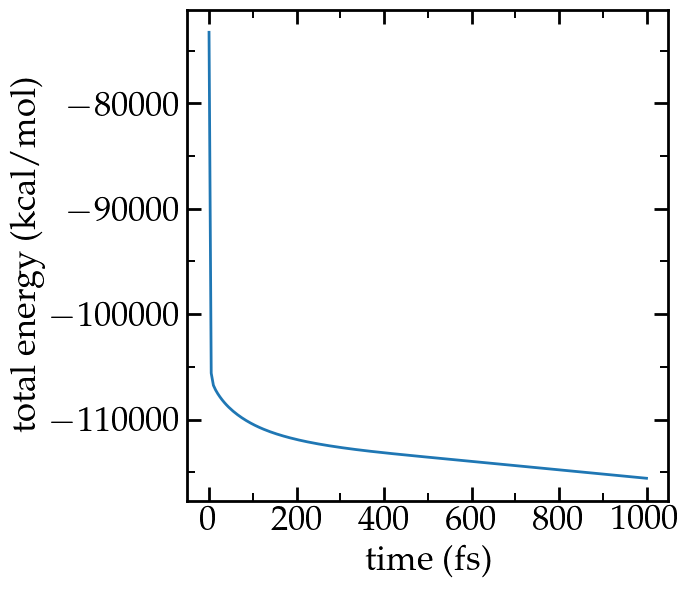

In [37]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
plt.plot(step/10, 
         etotal, 
         linewidth = 2)
divider = make_axes_locatable(ax1)
ax1.set_xlabel(r'time (fs)', fontdict=font)
ax1.set_ylabel(r'total energy (kcal/mol)', fontdict=font)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#plt.ylim(5, 65)
ax1.minorticks_on()
ax1.tick_params('both', length=10, width=2, which='major', direction='in')
ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.spines["top"].set_linewidth(2)
ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines["right"].set_linewidth(2)
#ax1.set_yticks([7, 20, 33, 47, 60])
#labels = ['$1.3$', '$1.4$', '$1.5$', '$1.6$', '$1.7$']
#ax1.set_yticklabels(labels)
minor_locator_y = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator_y)
minor_locator_x = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator_x)

#ax1.legend(frameon=False, fontsize=fontsize, loc='upper right', handletextpad=0.5,
#          handlelength = 0.5, borderpad = 0.4, labelspacing=0.3) 

fig.tight_layout()
plt.savefig('total_energy.png', bbox_inches = 'tight', pad_inches = 0.057)  
plt.show()